# Classification of breast cancer data  [35 points]

You will implement a Support Vector Machine (SVM) model for the classification of breast cancer data and compare its performance with K-nearest Neighbors.

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
## loading the raw data using pandas
bc=pd.read_csv('./data/data.csv')
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Pre-process and understand data (5 pts)

The data label is the diagnosis (M = malignant, B = benign).

**Question (2pts):** Convert diagnosis column to binary 0-1 label where 1 incidates malignancy.

In [15]:
## convert diagnosis to numerical label (M = malignant, B = benign)
y=bc['diagnosis'].replace({'M':1,'B':0})
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

**Question (3pts):** Plot the first 2 features against diagnosis. Is the data linearly separable and what happens if we fit a hard-margin SVM to the data?

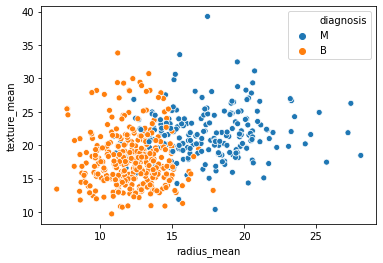

In [16]:
##plotting the the first 2 features against diagnosis
sns.scatterplot(bc['radius_mean'],bc['texture_mean'],hue=bc['diagnosis'])

#### Splitting the data: training and test 

In [25]:
from sklearn.model_selection import train_test_split

X = bc.iloc[:,2:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1. Support Vector Machine (SVM) (20 pts)

**Question (15pts):** Train and test a SVM model with the following requirements:
- Use GridSearchCV to find the best combination of model hyper-parameters: kernel: {linear, rbf}; for both kernel, C:{1, 10, 100, 1000}; for rbf kernel 'gamma' = {1e-3, 1e-4, 1e-5}.
- Try both accuracy and recall metric as scoring function in GridSearchCV
- Report the best hyper-parameter setting for each metric
- Report and plot the confusion matrix of the best estimator for each metric

# Tuning hyper-parameters for accuracy
best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
confusion matrix:
[[86  4]
 [ 1 52]]


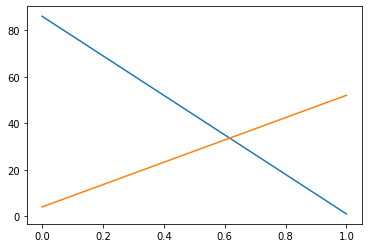

# Tuning hyper-parameters for recall
best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
confusion matrix:
[[86  4]
 [ 1 52]]


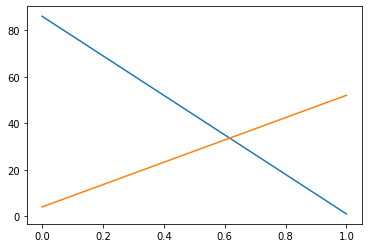

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

svc=SVC()
param_grid = {'kernel':['linear', 'rbf'],'C':[1, 10, 100, 1000],'gamma':[1e-3, 1e-4, 1e-5]}
scores = ['accuracy','recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid=param_grid, scoring=sc)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    print("best parameters:",grid.best_params_)
    svc = SVC(kernel=grid.best_params_['kernel'],C=grid.best_params_['C'],gamma=grid.best_params_['gamma'])
    svc.fit(X_train,y_train)
    y_pred_svc =svc.predict(X_test)
    ## computing and plotting confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test,y_pred_svc))
    plt.plot(confusion_matrix(y_test,y_pred_svc))
    plt.show()

**Question (5pts):** Fit an SVM model to a slice of data that contains only the first 2 features and visualize decision boudary based on these two features.

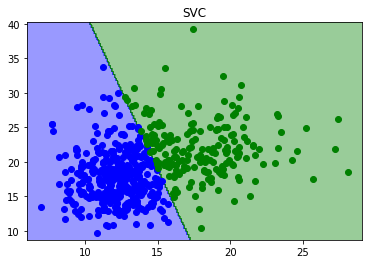

In [50]:
from sklearn import metrics
from matplotlib.colors import ListedColormap

## for display purposes, we fit the model on the first two features
svc.fit(X_train.iloc[:,:2],y_train)

## Plotting the decision boundary for all data (both train and test)
X_plot=X.iloc[:,:2]

X1,X2=np.meshgrid(np.arange(X_plot.iloc[:,0].min()-1,X_plot.iloc[:,0].max()+1,0.1),
                  np.arange(X_plot.iloc[:,1].min()-1,X_plot.iloc[:,1].max()+1,0.1))
plt.contourf(X1,X2,svc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.4,cmap=ListedColormap(('blue','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
plt.scatter(X_plot.iloc[:,0][svc.predict(X_plot)==0],X_plot.iloc[:,1][svc.predict(X_plot)==0],c='blue',label='0 class')
plt.scatter(X_plot.iloc[:,0][svc.predict(X_plot)==1],X_plot.iloc[:,1][svc.predict(X_plot)==1],c='green',label='1 class')
plt.title('SVC')
plt.show()

### 2. K-nearest Neighbors classifier (10pts)

**Question:** Repeat all the tasks for SVM to train a kNN classifier where the hyper-parameter is only k (number of neighbors) ranging from 1 to 50 in kNN. Compare the results with those of SVM, which classifier gives better results?

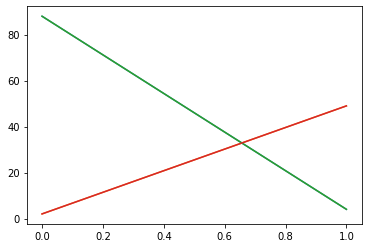

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

k_range=np.arange(1,51)
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy','recall']
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid=param_grid,scoring=sc)
    
    grid_knn.fit(X_train,y_train)
    
    knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
    knn.fit(X_train,y_train)
    y_pred_knn =knn.predict(X_test)
    ## computing and plotting confusion matrix
    plt.plot(confusion_matrix(y_test,y_pred_knn))

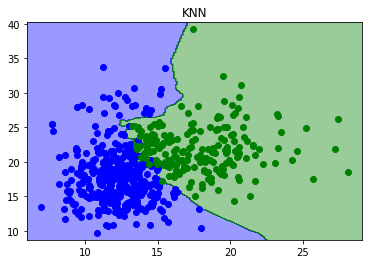

In [55]:
knn.fit(X_train.iloc[:,0:2], y_train)
## Plotting the decision boundary for all data (both train and test)
X_plot=X.iloc[:,:2]

X1,X2=np.meshgrid(np.arange(X_plot.iloc[:,0].min()-1,X_plot.iloc[:,0].max()+1,0.1),
                  np.arange(X_plot.iloc[:,1].min()-1,X_plot.iloc[:,1].max()+1,0.1))
plt.contourf(X1,X2,knn.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.4,cmap=ListedColormap(('blue','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
plt.scatter(X_plot.iloc[:,0][knn.predict(X_plot)==0],X_plot.iloc[:,1][knn.predict(X_plot)==0],c='blue',label='0 class')
plt.scatter(X_plot.iloc[:,0][knn.predict(X_plot)==1],X_plot.iloc[:,1][knn.predict(X_plot)==1],c='green',label='1 class')

plt.title('KNN')
plt.show()